In [3]:
import keras
from keras import layers

In [51]:
lenet5 = keras.Sequential()

lenet5.add(layers.Input(shape=(28, 28, 1)))
lenet5.add(layers.Conv2D(filters=6, kernel_size=5, padding='same', activation='relu'))
lenet5.add(layers.AveragePooling2D(pool_size=2))
lenet5.add(layers.Conv2D(filters=16, kernel_size=5, padding='valid', activation='relu'))
lenet5.add(layers.AveragePooling2D(pool_size=2))
lenet5.add(layers.Flatten())
lenet5.add(layers.Dense(120, activation='relu'))
lenet5.add(layers.Dense(84, activation='relu'))
lenet5.add(layers.Dense(10, activation='softmax'))

In [52]:
lenet5.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [57]:
print(train_target)


[7 3 5 ... 6 6 1]


In [58]:
print(type(train_target))

<class 'numpy.ndarray'>


In [25]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


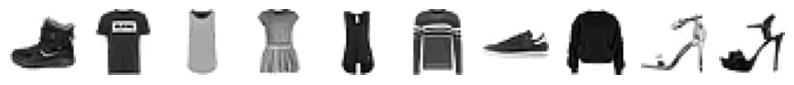

In [26]:
import matplotlib.pyplot as plt

fix, axs = plt.subplots(1, 10, figsize=(10, 10))

for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')

plt.show()



In [27]:
train_input = train_input.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)



In [53]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('models/lenet5-model-relu.keras', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

lenet5.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
hist = lenet5.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7052 - loss: 0.7902 - val_accuracy: 0.8532 - val_loss: 0.4192
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8510 - loss: 0.4071 - val_accuracy: 0.8672 - val_loss: 0.3611
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8788 - loss: 0.3310 - val_accuracy: 0.8796 - val_loss: 0.3366
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8904 - loss: 0.2979 - val_accuracy: 0.8897 - val_loss: 0.3031
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9002 - loss: 0.2753 - val_accuracy: 0.8888 - val_loss: 0.3061
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9025 - loss: 0.2610 - val_accuracy: 0.8923 - val_loss: 0.3048


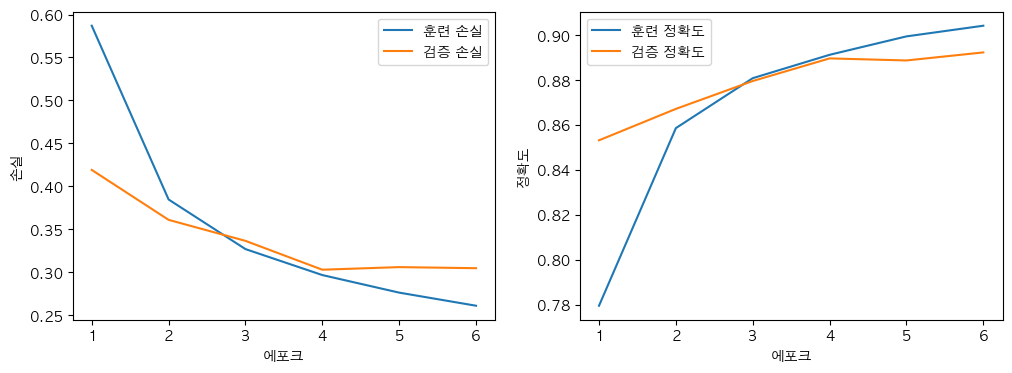

In [55]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # 맥OS용 한글 폰트
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

epochs = range(1, len(hist.history['loss']) + 1)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(epochs, hist.history['loss'], label='훈련 손실')
axs[0].plot(epochs, hist.history['val_loss'], label='검증 손실')
axs[0].set_xticks(epochs)
axs[0].set_xlabel('에포크')
axs[0].set_ylabel('손실')
axs[0].legend()

axs[1].plot(epochs, hist.history['accuracy'], label='훈련 정확도')
axs[1].plot(epochs, hist.history['val_accuracy'], label='검증 정확도')
axs[1].set_xticks(epochs)
axs[1].set_xlabel('에포크')
axs[1].set_ylabel('정확도')
axs[1].legend()

plt.show()

In [56]:
# 최종 정확도 확인
print(f"최종 validation accuracy: {max(hist.history['val_accuracy']):.4f}")
print(f"최종 validation accuracy: {max(hist.history['val_accuracy']) * 100:.2f}%")

# 최고 성능 에폭 찾기
import numpy as np
best_epoch = np.argmax(hist.history['val_accuracy']) + 1  # 1부터 시작하므로 +1
total_epochs = len(hist.history['val_accuracy'])

print(f"\n총 학습 에폭 수: {total_epochs}")
print(f"최고 성능 에폭: {best_epoch}")
print(f"최고 val_accuracy: {hist.history['val_accuracy'][best_epoch-1]:.4f}")

# 테스트 셋에서 평가
test_input_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
test_loss, test_accuracy = lenet5.evaluate(test_input_scaled, test_target, verbose=0)

print(f"\n테스트 정확도: {test_accuracy:.4f}")
print(f"테스트 정확도: {test_accuracy * 100:.2f}%")


최종 validation accuracy: 0.8923
최종 validation accuracy: 89.23%

테스트 정확도: 0.8834
테스트 정확도: 88.34%


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step
총 테스트 샘플 수: 10000
틀린 예측 수: 1421
정확도: 85.79%


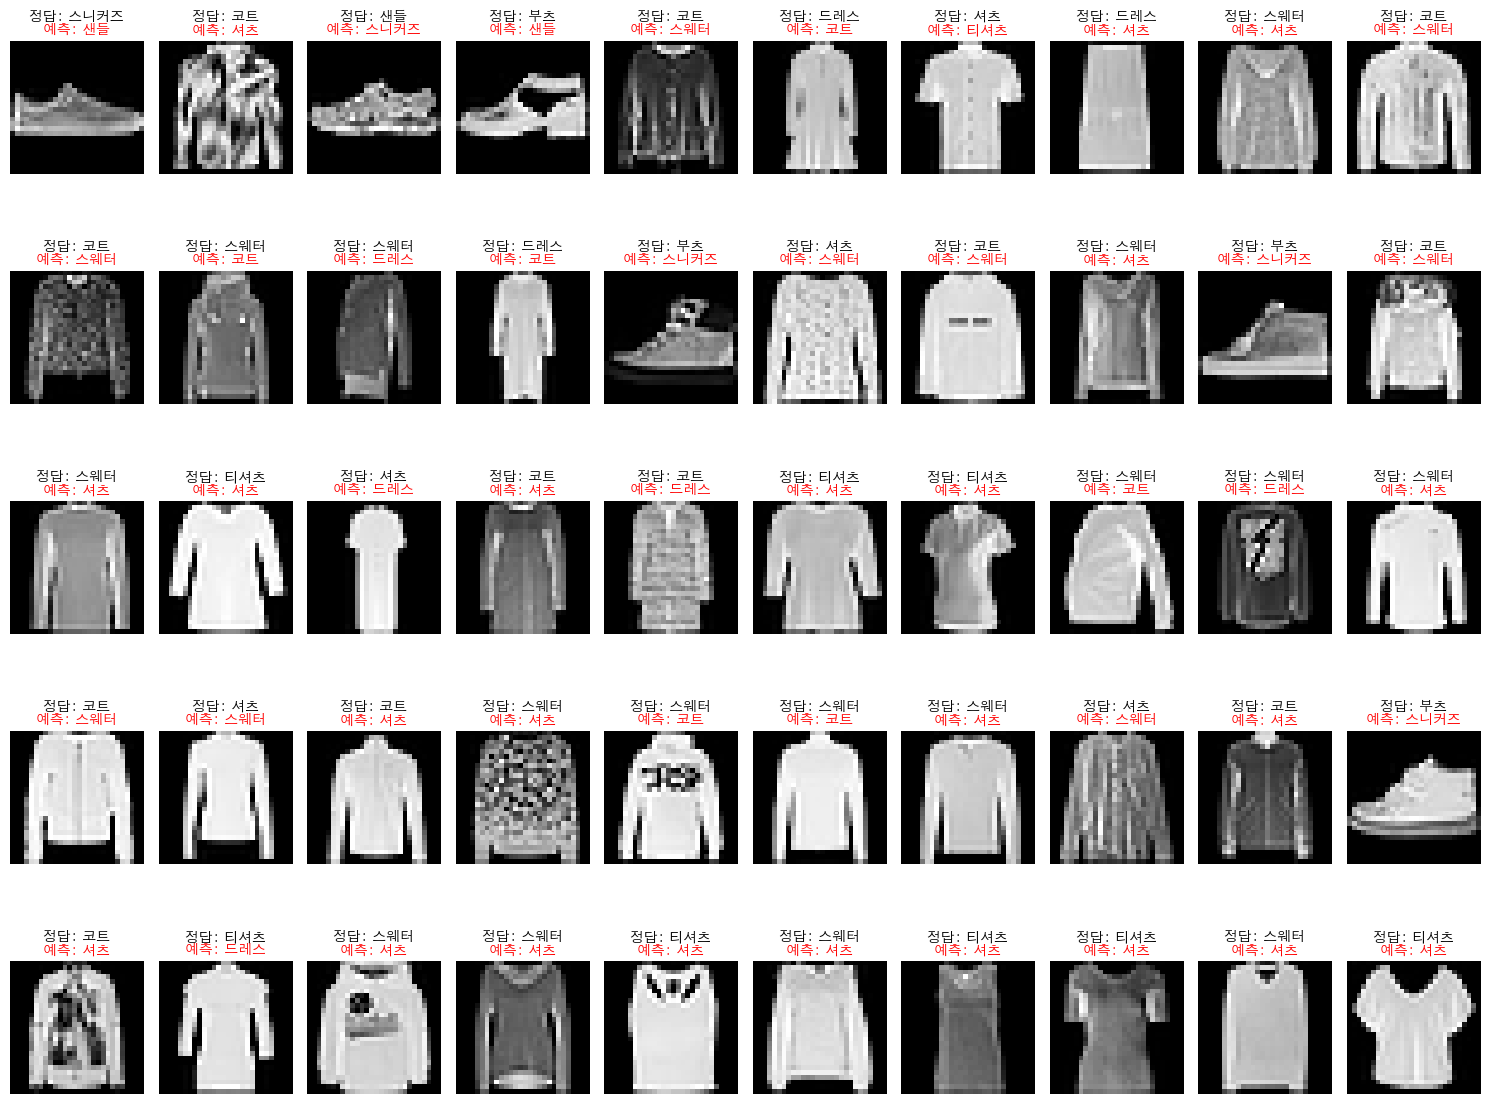

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Fashion MNIST 클래스 이름 정의
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_names_ko = ['티셔츠', '바지', '스웨터', '드레스', '코트',
                  '샌들', '셔츠', '스니커즈', '가방', '부츠']

# 테스트에서 예측이 실패한 것 확인하기
test_input_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
predictions = lenet5.predict(test_input_scaled)
predicted_labels = np.argmax(predictions, axis=1)

# 예측이 틀린 인덱스 찾기
incorrect_indices = np.where(predicted_labels != test_target)[0]

print(f"총 테스트 샘플 수: {len(test_target)}")
print(f"틀린 예측 수: {len(incorrect_indices)}")
print(f"정확도: {(len(test_target) - len(incorrect_indices)) / len(test_target) * 100:.2f}%")

# 틀린 예측 중 처음 50개 시각화
fig, axes = plt.subplots(5, 10, figsize=(15, 12))
axes = axes.ravel()

for i in range(min(50, len(incorrect_indices))):
    idx = incorrect_indices[i]
    axes[i].imshow(test_input[idx], cmap='gray')
    
    # 정답과 예측을 다른 색으로 표시
    axes[i].text(0.5, 1.15, f'정답: {class_names_ko[test_target[idx]]}', 
                 transform=axes[i].transAxes, ha='center', fontsize=10, color='black')
    axes[i].text(0.5, 1.05, f'예측: {class_names_ko[predicted_labels[idx]]}', 
                 transform=axes[i].transAxes, ha='center', fontsize=10, color='red')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [46]:
len(incorrect_indices)

1421

In [38]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 시스템에 설치된 폰트 목록 확인
font_list = [f.name for f in fm.fontManager.ttflist]
korean_fonts = [f for f in font_list if 'Gothic' in f or 'Nanum' in f]
print(korean_fonts)


['Nanum Myeongjo', 'BIZ UDGothic', 'Hiragino Maru Gothic Pro', 'Tsukushi B Round Gothic', 'Malgun Gothic', 'Toppan Bunkyu Midashi Gothic', 'AppleGothic', 'Nanum Brush Script', 'Malgun Gothic', 'Apple LiGothic', 'YuGothic', 'Tsukushi A Round Gothic', 'Apple SD Gothic Neo', 'Noto Sans Gothic', 'Nanum Gothic', 'Toppan Bunkyu Gothic', 'YuGothic', 'Malgun Gothic']


가장 많이 틀린 예측 패턴 (정답 → 예측):
티셔츠 → 셔츠: 193회
스웨터 → 셔츠: 159회
스웨터 → 코트: 141회
코트 → 셔츠: 115회
셔츠 → 티셔츠: 113회
코트 → 스웨터: 77회
셔츠 → 코트: 71회
셔츠 → 스웨터: 57회
티셔츠 → 드레스: 56회
부츠 → 스니커즈: 49회


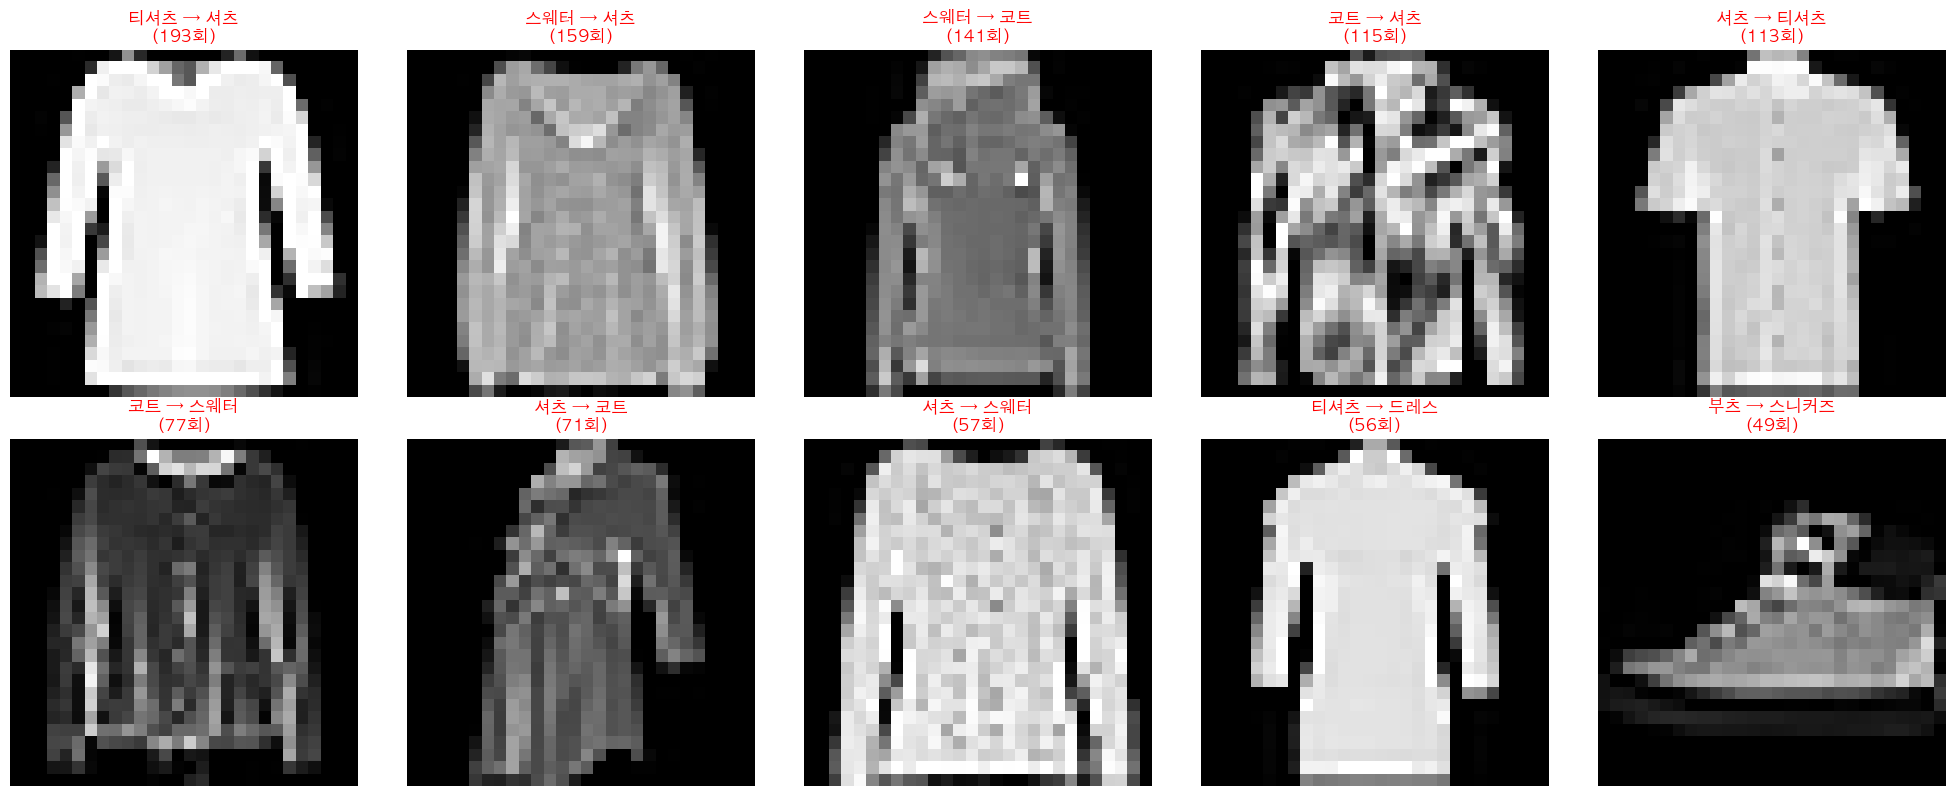


클래스별 실패율:
티셔츠: 26.70%
바지: 3.40%
스웨터: 32.70%
드레스: 10.00%
코트: 23.40%
샌들: 3.20%
셔츠: 27.90%
스니커즈: 3.70%
가방: 5.00%
부츠: 6.10%


In [50]:
# 실패한 데이터를 모두 찾아서 정답 레이블과 실패 레이블의 쌍을 출력하여 시각화

# 실패한 예측들의 정답과 예측 레이블 쌍 분석
incorrect_pairs = []
for idx in incorrect_indices:
    true_label = test_target[idx]
    pred_label = predicted_labels[idx]
    incorrect_pairs.append((true_label, pred_label))

# 실패 패턴 분석
from collections import Counter
pair_counts = Counter(incorrect_pairs)
most_common_errors = pair_counts.most_common(10)

print("가장 많이 틀린 예측 패턴 (정답 → 예측):")
for (true, pred), count in most_common_errors:
    print(f"{class_names_ko[true]} → {class_names_ko[pred]}: {count}회")

# 실패한 예측들을 그룹별로 시각화
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for i, ((true_label, pred_label), count) in enumerate(most_common_errors):
    # 해당 패턴의 첫 번째 예시 찾기
    for idx in incorrect_indices:
        if test_target[idx] == true_label and predicted_labels[idx] == pred_label:
            axes[i].imshow(test_input[idx], cmap='gray')
            axes[i].set_title(f'{class_names_ko[true_label]} → {class_names_ko[pred_label]}\n({count}회)', 
                             fontsize=12, color='red')
            axes[i].axis('off')
            break

plt.tight_layout()
plt.show()

# 각 클래스별 실패율 분석
class_error_rates = {}
for class_idx in range(10):
    class_samples = np.where(test_target == class_idx)[0]
    class_errors = np.where((test_target == class_idx) & (predicted_labels != test_target))[0]
    error_rate = len(class_errors) / len(class_samples) * 100
    class_error_rates[class_idx] = error_rate

print("\n클래스별 실패율:")
for class_idx, error_rate in sorted(class_error_rates.items()):
    print(f"{class_names_ko[class_idx]}: {error_rate:.2f}%")